In [7]:
"""                                                                                                 
Separate file to keep segmentation paramters in it. E.g,                                            
stopping_criterion = 0.47                                                                           
vessel_probability_threshold = .68                                                                  
dilation_size = 3                                                                                   
minimum_size = 4000
"""
from segmentation_param import *
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp
import time
import matplotlib.pyplot as plt

In [8]:
#segmentation entry point functions
from read_tiff_files import read_tiff_files
from classify_pixel import classify_pixel
import detect_cells
import segment_vessels 
import create_synth_dict
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Following parameters to be passed in as parameters to this script. 
tiff_files_location = '/home/aaron/Dropbox (htem)/AK/Xray/xbrain/data/ppc_frompia'
classifier_file = '/home/aaron/Dropbox (htem)/AK/Xray/xbrain/LDMS2_PPC_vesselsOnly.ilp'

In [10]:
# Read tiff stack files - output of tomopy. 
input_data = read_tiff_files(tiff_files_location)

In [11]:
print("input_data shape", input_data.shape)

('input_data shape', (449, 87, 297))


In [12]:
%matplotlib inline

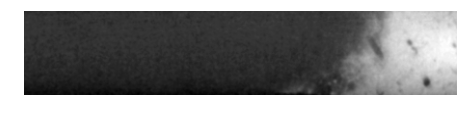

In [14]:
ndp.plot(input_data, slice=2)

In [15]:
# Compute cell and vessel probability map.
probability_maps = classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size) 

INFO ilastik_main: Starting ilastik from "/home/aaron/anaconda2/envs/ilastik-dev".
Starting ilastik from "/home/aaron/anaconda2/envs/ilastik-dev".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO ilastik.shell.projectManager: Opening Project: /home/aaron/Dropbox (htem)/AK/Xray/xbrain/LDMS2_PPC_vesselsOnly.ilp


WARNING dataset.py(76): DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


input_data.shape (449, 87, 297)
label_names, label_colors, probability_colors ['Vessels', 'Cells', 'Bg'] [(255, 0, 0), (0, 255, 0), (255, 255, 0)] [(255, 0, 0), (0, 255, 0), (255, 255, 0)]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 300.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (86, 87, 87, 3)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 372.5MiB


WARNING arraytypes.py(1263): VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


DEBUG lazyflow.operators.classifierOperators: Features took 2.266383 seconds, Prediction took 2.042504 seconds for roi: [0, 0, 87, 0] : [86, 87, 174, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 3.04934 seconds, Prediction took 2.144397 seconds for roi: [0, 0, 174, 0] : [86, 87, 261, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 4.280858 seconds, Prediction took 2.050721 seconds for roi: [0, 0, 0, 0] : [86, 87, 87, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 5.684959 seconds, Prediction took 4.111427 seconds for roi: [86, 0, 0, 0] : [172, 87, 87, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 8.675504 seconds, Prediction took 1.610703 seconds for roi: [0, 0, 261, 0] : [86, 87, 297, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 10.232745 seconds, Prediction took 1.111757 seconds for roi: [86, 0, 261, 0] : [172, 87, 297, 3]
DEBUG lazyflow.operators.classifierOperators: Features took 7.658802 seconds, P

In [16]:
cell_prob_map = probability_maps[:, :, :, 1]
vessel_prob_map = probability_maps[:, :, :, 0]

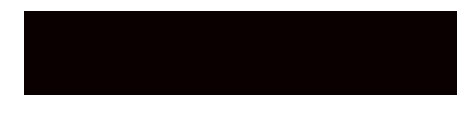

In [18]:
ndp.plot(cell_prob_map, slice=10, cmap1='hot')

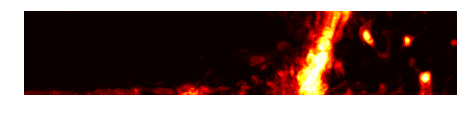

In [19]:
ndp.plot(vessel_prob_map, slice=10, cmap1='hot')

In [20]:
# Parallel operation to detect cells to be designed. Hard coded for now - cut 400x400x40 volume.
crop_probability_maps = probability_maps[:,:,:]
crop_input_data = input_data[:,:,:]
crop_cell_prob_map = crop_probability_maps[:, :, :, 1]
crop_vessel_prob_map = crop_probability_maps[:, :, :, 0]

In [21]:
print(cell_map.shape)

NameError: name 'cell_map' is not defined

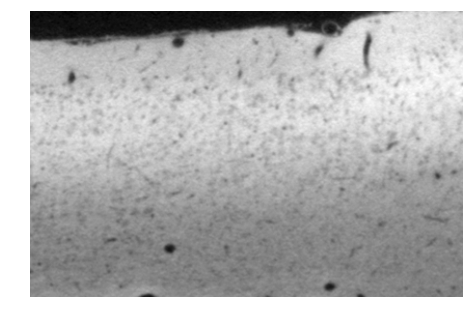

In [510]:
ndp.plot(crop_input_data, slice=10, cmap1='gray')

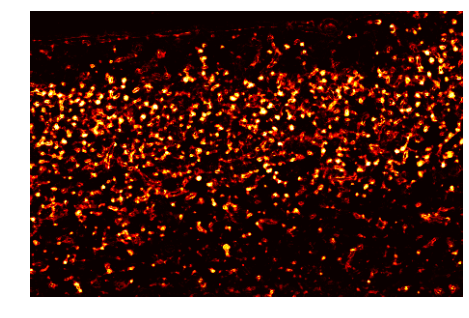

In [512]:
ndp.plot(crop_cell_prob_map, slice=10, cmap1='hot')

In [513]:
cell_probability_threshold=0.2
stopping_criterion=0.7
initial_template_size=6
dilation_size=2
max_no_cells=10000

print(cell_probability_threshold,stopping_criterion,initial_template_size,dilation_size,max_no_cells)

t=time.time()
centroids, cell_map = detect_cells.detect_cells(crop_cell_prob_map, cell_probability_threshold, stopping_criterion, initial_template_size, dilation_size, max_no_cells)
print(time.time()-t)



(0.2, 0.7, 6, 2, 10000)
Iteration remaining =  9999 Correlation =  [[ 0.96803576]]
Iteration remaining =  9949 Correlation =  [[ 0.90035713]]
Iteration remaining =  9899 Correlation =  [[ 0.88357145]]
Iteration remaining =  9849 Correlation =  [[ 0.86375004]]
Iteration remaining =  9799 Correlation =  [[ 0.85178572]]
Iteration remaining =  9749 Correlation =  [[ 0.83982146]]
Iteration remaining =  9699 Correlation =  [[ 0.83125001]]
Iteration remaining =  9649 Correlation =  [[ 0.8246429]]
Iteration remaining =  9599 Correlation =  [[ 0.81928575]]
Iteration remaining =  9549 Correlation =  [[ 0.8125]]
Iteration remaining =  9499 Correlation =  [[ 0.8075]]
Iteration remaining =  9449 Correlation =  [[ 0.80071425]]
Iteration remaining =  9399 Correlation =  [[ 0.79535717]]
Iteration remaining =  9349 Correlation =  [[ 0.79035717]]
Iteration remaining =  9299 Correlation =  [[ 0.78464288]]
Iteration remaining =  9249 Correlation =  [[ 0.78017861]]
Iteration remaining =  9199 Correlation =

In [514]:
print(crop_cell_prob_map.shape)
print(cell_map.shape)
print(centroids.shape)

(449, 297, 87)
(449, 297, 87)
(1779, 4)


Cell Segmentation


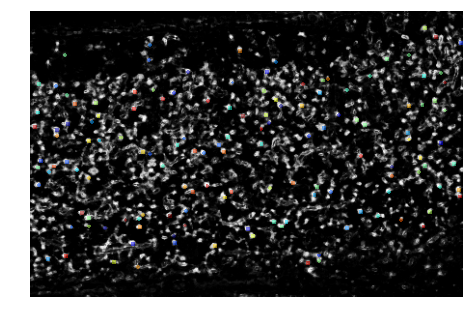

In [515]:
print("Cell Segmentation")
ndp.plot(crop_cell_prob_map, cell_map, slice = 80, alpha = 0.5)

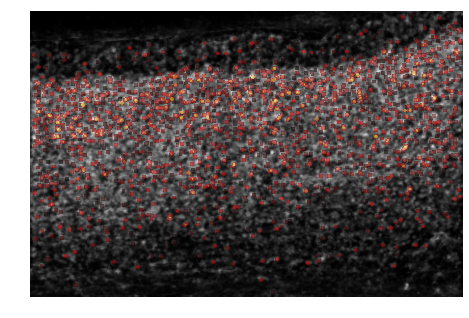

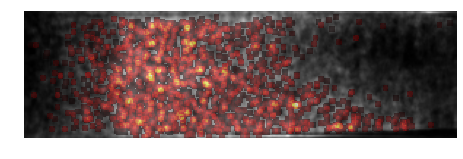

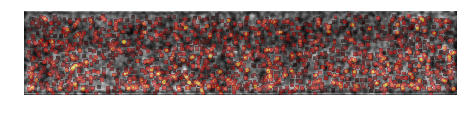

In [518]:
crop_cell_prob_map_XY = np.mean(crop_cell_prob_map,axis=2)
cell_map_XY = np.mean(cell_map,axis=2)
ndp.plot(crop_cell_prob_map_XY,cell_map_XY, alpha=0.5,cmap2='hot')
crop_cell_prob_map_YZ = np.mean(crop_cell_prob_map,axis=0)
cell_map_YZ = np.mean(cell_map,axis=0)
ndp.plot(crop_cell_prob_map_YZ,cell_map_YZ, alpha=0.5,cmap2='hot')
crop_cell_prob_map_XZ = np.mean(crop_cell_prob_map,axis=1)
cell_map_XZ = np.mean(cell_map,axis=1)
ndp.plot(crop_cell_prob_map_XZ,cell_map_XZ, alpha=0.5,cmap2='hot')

<function matplotlib.pyplot.show>

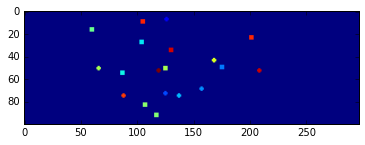

In [492]:
for i in np.arange(5,50):
    plt.imshow(cell_map[:,:,i])
plt.show

In [462]:
np.nanmean(cell_map_XY)

5.1266102383383281

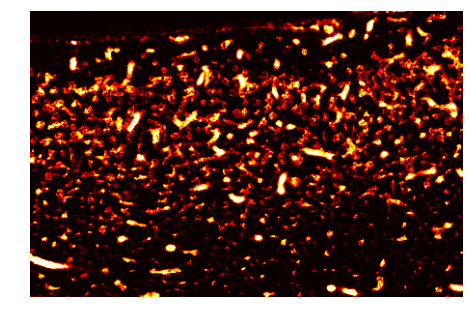

In [519]:
ndp.plot(vessel_prob_map, slice=20, cmap1='hot')

In [520]:
print(vessel_prob_map.shape)

(449, 297, 87)


In [37]:
reload(segment_vessels)
vessel_probability_threshold=0.5
dilation_size= 1
minimum_size = 1
vessel_map = segment_vessels.segment_vessels(vessel_prob_map, vessel_probability_threshold, dilation_size, minimum_size) 
print("Vessel Segmentation")


Vessel Segmentation


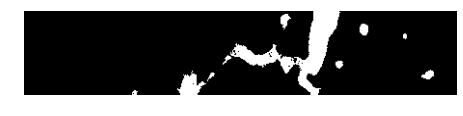

In [45]:
ndp.plot(vessel_map, slice = 17, alpha = 0.5)

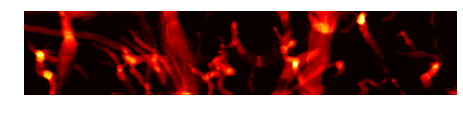

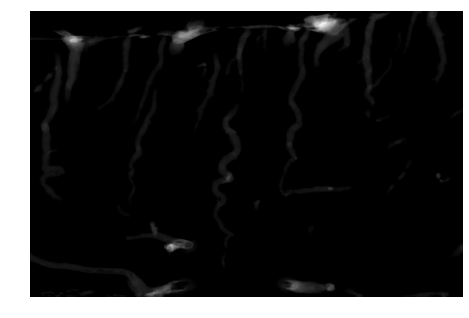

In [41]:
ndp.plot(np.mean(vessel_map,axis=2),cmap1='hot')
ndp.plot(np.mean(vessel_map,axis=1))

In [39]:
sio.savemat('/home/aaron/Dropbox (htem)/AK/Xray/xbrain/ppc_xray_vesselsOnly.mat', {'vessel_map':vessel_map})

In [40]:
sio.whosmat('/home/aaron/Dropbox (htem)/AK/Xray/xbrain/ppc_xray_vesselsOnly.mat')

[('vessel_map', (449, 87, 297), 'logical')]